In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import joblib

In [2]:
data = pd.read_parquet('/content/full_data.parquet')
data.head(10)

,rtctime,lat,lon,target_temperature,feature_c,feature_ct,feature_motorspeed,ambient_temp,car_speed,soc
0,1672911588170,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
1,1672911588180,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
2,1672911588190,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
3,1672911588200,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.05,84.199997
4,1672911588210,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
5,1672911588220,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
6,1672911588230,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
7,1672911588240,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
8,1672911588250,68.860123,18.346718,-4.281718,20.629015,-1.0,72.560976,-3.9,1.17,84.199997
9,1672911588260,68.860123,18.346718,-4.281718,20.629015,-1.0,72.560976,-3.9,1.17,84.199997


In [3]:
data = data.reset_index()
data.drop(['index'],1,inplace=True)
print('Before removing duplicates data shape: ',data.shape)
data = data.drop_duplicates(subset = ['rtctime'], keep = 'first')
print('After removing duplicates data shape: ',data.shape)
data = data.sort_values(by = 'rtctime', ascending = True)
data = data.reset_index()
data.drop(['index'],1,inplace=True)
data.head(10)

<ipython-input-3-ee6989b01e9b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['index'],1,inplace=True)


Before removing duplicates data shape:  (8159719, 10)
After removing duplicates data shape:  (8156409, 10)


<ipython-input-3-ee6989b01e9b>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['index'],1,inplace=True)


,rtctime,lat,lon,target_temperature,feature_c,feature_ct,feature_motorspeed,ambient_temp,car_speed,soc
0,1672911588170,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
1,1672911588180,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
2,1672911588190,68.860123,18.346718,-4.281718,20.947325,-1.0,68.902439,-3.9,1.05,84.199997
3,1672911588200,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.05,84.199997
4,1672911588210,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
5,1672911588220,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
6,1672911588230,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
7,1672911588240,68.860123,18.346718,-4.281718,21.361129,-1.0,70.731707,-3.9,1.11,84.199997
8,1672911588250,68.860123,18.346718,-4.281718,20.629015,-1.0,72.560976,-3.9,1.17,84.199997
9,1672911588260,68.860123,18.346718,-4.281718,20.629015,-1.0,72.560976,-3.9,1.17,84.199997


In [5]:
X = data.drop(['rtctime','lat','lon','target_temperature'],1)
y = data['target_temperature']
print('Independent features shape: ', X.shape, 'Target variable shape: ', y.shape)

Independent features shape:  (8156409, 6) Target variable shape:  (8156409,)


<ipython-input-5-2f094f58bf47>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop(['rtctime','lat','lon','target_temperature'],1)


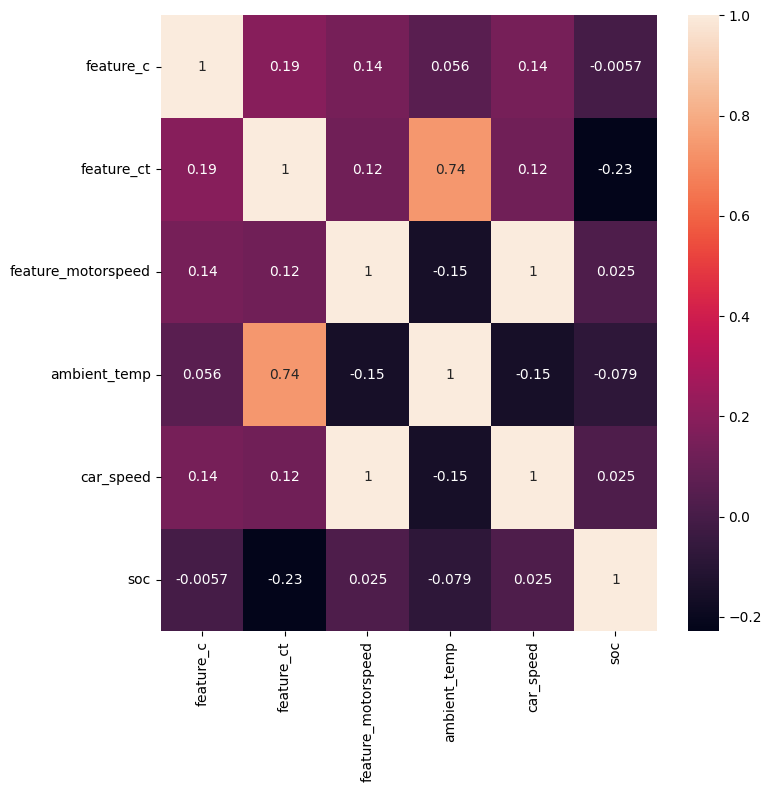

In [6]:
feature_corr = X.corr()
plt.figure(figsize=(8,8))
sns.heatmap(feature_corr, annot = True)
plt.show()

In [7]:
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled

array([[ 0.67255378, -0.63751442, -2.22262279,  0.77050431, -2.23972402,
         1.45092095],
       [ 0.67255378, -0.63751442, -2.22262279,  0.77050431, -2.23972402,
         1.45092095],
       [ 0.67255378, -0.63751442, -2.22262279,  0.77050431, -2.23972402,
         1.45092095],
       ...,
       [-0.97479533,  0.93907854,  0.4467585 ,  0.80128753,  0.45293845,
        -0.3807295 ],
       [-0.97479533,  0.93907854,  0.4467585 ,  0.83207068,  0.45293845,
        -0.3807295 ],
       [-0.97479533,  0.93907854,  0.4467585 ,  0.83207068,  0.45293845,
        -0.3807295 ]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5709486, 6) (2446923, 6) (5709486,) (2446923,)


In [10]:
rfr = RandomForestRegressor(n_estimators=50, max_depth=5)
rfr_model = rfr.fit(X_train, y_train)
rfr_model

RandomForestRegressor(max_depth=5, n_estimators=50)

In [15]:
y_pred = rfr_model.predict(X_test)
print("R2 Score: ",r2_score(y_test, y_pred))
print("Error: ", mean_squared_error(y_test, y_pred))

R2 Score:  0.8029697809930212
Error:  76.88128108565215


In [16]:
rfr_model_file = "rfr_model.sav"
joblib.dump(rfr_model, rfr_model_file)

['rfr_model.sav']

In [18]:
rfr_model_load = joblib.load('/content/rfr_model.sav')
new_pred = rfr_model_load.score(X_test, y_test)
print(new_pred)

0.8029697809930212


In [25]:
feature_importances = rfr_model.feature_importances_
column_names = X.columns
feature_names = {'importance':feature_importances, 'column':column_names}
feature_names = pd.DataFrame(feature_names)
feature_names

,importance,column
0,0.000000,feature_c
1,0.627563,feature_ct
2,0.031406,feature_motorspeed
3,0.072276,ambient_temp
4,0.186989,car_speed
5,0.081767,soc
